<a href="https://colab.research.google.com/github/dishitk/machine-learning/blob/master/Machine_Learning_Project_2_Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/My Drive/breast-cancer-wisconsin.csv', header=None)
df.columns = ["id",  "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", 
              "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", 
              "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"]
df.head(5)

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [ ]:
df['Bare Nuclei'].fillna((df['Bare Nuclei'].median()), inplace=True)

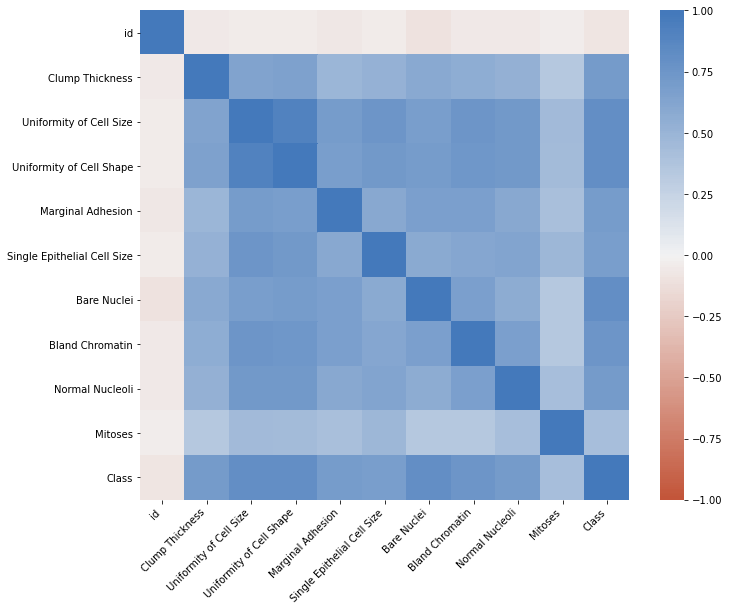

In [ ]:
import seaborn as sns
corr = df.corr()

plt.figure(figsize=(11, 9))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 250, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
df['Class'].replace(2,0, inplace=True)
df['Class'].replace(4,1, inplace=True)
X = np.array(df.iloc[:, 1:10])
Y = np.array(df.iloc[:,10:]).flatten()
print(X.shape)
print(Y.shape)

(699, 9)
(699,)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1, random_state=0)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(629, 9)
(629,)
(70, 9)
(70,)


In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Histogram(x=Y)])
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0,1],
        ticktext = ['Benign', 'Malignant']
    )
)
fig.show()

In [ ]:
def gradient_weight_calculation(w, x, y):
    seperation = 1 - (y * np.dot(x, w))
    dw = np.zeros(len(w))
    for i, distance in enumerate(seperation):
        if max(0, distance) == 0:
            d = w
        else:
            d = w - (y[i] * x[i])
        dw += d
    return dw

In [ ]:
from sklearn.utils import shuffle
W = np.zeros(X_train[0].shape)
learning_rate= 0.01
epochs = 1000
for _ in range(epochs):
    dw = gradient_weight_calculation(W, X_train, Y_train)
    dw = dw / len(Y_train)
    W = W - (learning_rate * dw)

In [ ]:
from sklearn.metrics import accuracy_score
test_predictions = []
for row in X_test:
  prediction_row = np.dot(row,W)
  if (prediction_row > 1):
        test_predictions.append(1)
  else:
        test_predictions.append(0)
print("Accuracy Score: ",accuracy_score(Y_test,test_predictions)*100)

Accuracy Score:  97.14285714285714
